<a href="https://colab.research.google.com/github/SebastianBentert/example_code/blob/main/freecodedataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from collections import defaultdict


def calculate(nums):
  if len(nums)!=9:
    raise ValueError("List must contain nine numbers.")
  matrix = np.array(nums).reshape((3,3))
  ans = defaultdict(list)
  ans['mean'].append(list(np.mean(matrix, axis=0)))
  ans['mean'].append(list(np.mean(matrix, axis=1)))
  ans['mean'].append(np.mean(nums))
  ans['standard deviation'].append(list(np.std(matrix, axis=0)))
  ans['standard deviation'].append(list(np.std(matrix, axis=1)))
  ans['standard deviation'].append(np.std(nums))
  ans['variance'].append(list(np.var(matrix, axis=0)))
  ans['variance'].append(list(np.var(matrix, axis=1)))
  ans['variance'].append(np.var(nums))
  ans['max'].append(list(np.max(matrix, axis=0)))
  ans['max'].append(list(np.max(matrix, axis=1)))
  ans['max'].append(np.max(nums))
  ans['min'].append(list(np.min(matrix, axis=0)))
  ans['min'].append(list(np.min(matrix, axis=1)))
  ans['min'].append(np.min(nums))
  ans['sum'].append(list(np.sum(matrix, axis=0)))
  ans['sum'].append(list(np.sum(matrix, axis=1)))
  ans['sum'].append(np.sum(nums))

  return ans





In [ ]:
print(calculate([0,1,2,3,4,5,6,7,8]))

defaultdict(<class 'list'>, {'mean': [[3.0, 4.0, 5.0], [1.0, 4.0, 7.0], 4.0], 'standard deviation': [[2.449489742783178, 2.449489742783178, 2.449489742783178], [0.816496580927726, 0.816496580927726, 0.816496580927726], 2.581988897471611], 'variance': [[6.0, 6.0, 6.0], [0.6666666666666666, 0.6666666666666666, 0.6666666666666666], 6.666666666666667], 'max': [[6, 7, 8], [2, 5, 8], 8], 'min': [[0, 1, 2], [0, 3, 6], 0], 'sum': [[9, 12, 15], [3, 12, 21], 36]})


In [ ]:
import pandas as pd

In [ ]:
def calculate_demographic_data(print_data=True):
    # Read data from file
    df = pd.read_csv('/content/adult.data.csv')
    race_count = df['race'].value_counts()
    average_age_men = df['age'][df['sex']=='Male'].mean()
    percentage_bachelors = format((df[df['education']=='Bachelors'].shape[0]/df.shape[0])*100,'.2f')
    
    lower_education = df['education'].isin(['Bachelors','Masters','Doctorate']).value_counts()[False]
    higher_education = df['education'].isin(['Bachelors','Masters','Doctorate']).value_counts()[True]
    higher_education_rich = format((df['salary'][df['education'].isin(['Bachelors','Masters','Doctorate'])].value_counts()['>50K']/higher_education)*100, '.2f')
    lower_education_rich = format((df['salary'][~df['education'].isin(['Bachelors','Masters','Doctorate'])].value_counts()['>50K']/lower_education)*100, '.2f')
    min_work_hours = df['hours-per-week'].min()
    min_work_workers = df['salary'][df['hours-per-week']==min_work_hours].count()
    rich_percentage = format((df['salary'][df['hours-per-week']==min_work_hours].value_counts()['>50K']/min_work_workers)*100, '.2f')
    top_IN_occupation = df['occupation'][df['native-country']=='India'][df['salary']=='>50K'].value_counts().idxmax()
    countries = set(df['native-country'].values)
    cur=''
    n=0
    for country in countries:
      try:
        if df['salary'][df['native-country']==country].value_counts()['>50K']/df['salary'][df['native-country']==country].count()>n:
          n=df['salary'][df['native-country']==country].value_counts()['>50K']/df['salary'][df['native-country']==country].count()
          cur= country
      except KeyError:
        continue
    highest_earning_country = cur
    highest_earning_country_percentage = format(n,'.1f')
    return cur,n

    #return df['salary'][df['education'] in 'Bachelors']
                        #in ['Bachelors','Masters','Doctorate']].value_counts()

In [ ]:
print(calculate_demographic_data())

('Iran', 0.4186046511627907)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

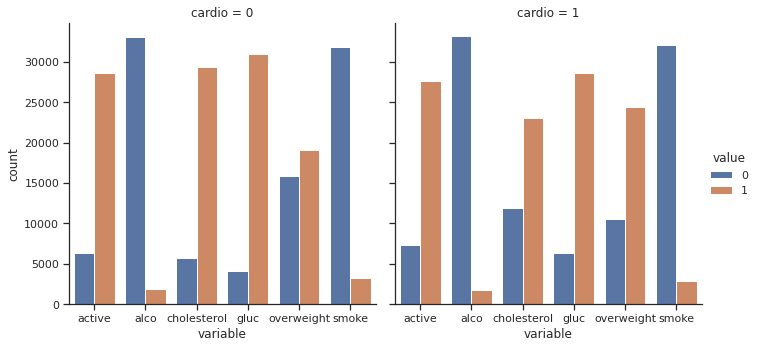

In [ ]:
# Import data
df = pd.read_csv('/medical_examination.csv')
df['overweight'] = (df['weight']/(df['height']**2) > 0.0025).astype(int)
df['cholesterol'] = (df['cholesterol']<=1).astype(int)
df['gluc'] = (df['gluc']<=1).astype(int)
features=['active','alco','cholesterol','gluc','overweight','smoke']
df_cat = (pd.melt(df,value_vars=features,id_vars=['cardio']))
sns.catplot(data=df_cat, kind='count', x='variable', hue='value', col='cardio');

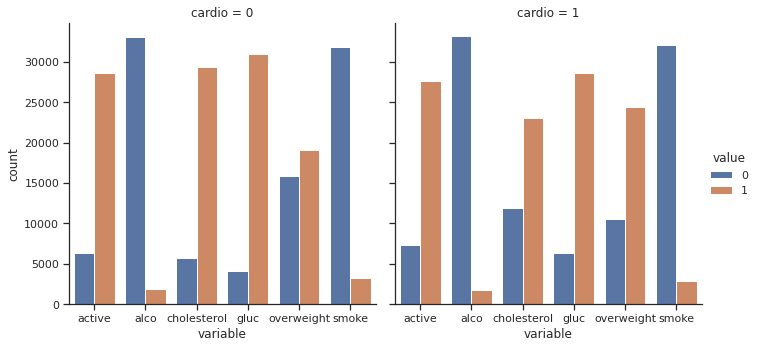

In [ ]:
print(df.shape[0])
df = df[(df['ap_lo']<=df['ap_hi'])&(df['height']>=df['height'].quantile(0.025))&(df['height']<=df['height'].quantile(0.975))&(df['height']<=df['height'].quantile(0.975))&(df['weight']>=df['weight'].quantile(0.025))]
print(df.shape[0])

67260


In [ ]:
corr = df.corr()

In [ ]:
mask = np.triu(np.ones_like(corr))

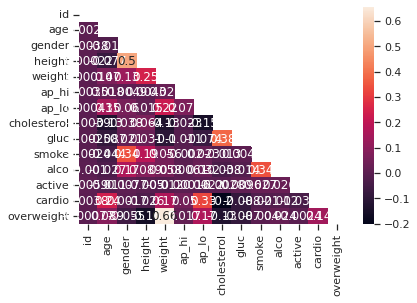

In [ ]:
sns.heatmap(corr,mask=mask,annot=True);

In [196]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [197]:
df = pd.read_csv('/content/fcc-forum-pageviews.csv').set_index('date')
df.index  = pd.to_datetime(df.index)
print(df.shape)
df = df[(df['value']<=df['value'].quantile(0.975)) & (df['value']>=df['value'].quantile(0.025))]
print(df.shape)

(1304, 1)
(1238, 1)


In [220]:
def draw_line_plot(df=df):
  #fig=plt.figure(figsize=(10,10))
  fig = df.plot(color='r',figsize=(20,5),legend=False)
  plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
  plt.xlabel('Date')
  plt.ylabel('Page Views')
  print(fig)


AxesSubplot(0.125,0.2;0.775x0.68)


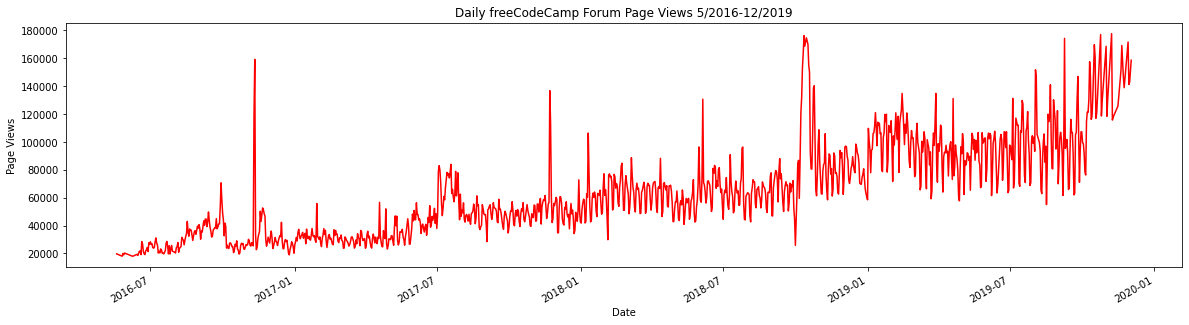

In [221]:
draw_line_plot()

In [243]:
def draw_bar_plot(df=df):
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar["Years"] = df_bar.index.year
    df_bar["Months"] = df_bar.index.month_name()
    df_bar = pd.DataFrame(df_bar.groupby(["Years", "Months"],sort=False)["value"].mean())
    #df_bar = pd.DataFrame([[2016, 'January',0.0], [2016, 'February',0.0],[2016, 'March',0.0],[2016, 'April',0.0]], columns=['Years','Months','value']).append(df_bar)
    #print (df_bar2)
    df_bar = df_bar.reset_index()
    df_bar = pd.DataFrame([[2016, 'January',0.0], [2016, 'February',0.0],[2016, 'March',0.0],[2016, 'April',0.0]], columns=['Years','Months','value']).append(df_bar,ignore_index=True)
    print (df_bar)
    # Draw bar plot

    chart = sns.barplot(data=df_bar, x="Years", y="value", hue="Months")

    # Save image and return fig (don't change this part)
    #fig.savefig('bar_plot.png')
    #return fig

    Years     Months          value
0    2016    January       0.000000
1    2016   February       0.000000
2    2016      March       0.000000
3    2016      April       0.000000
4    2016        May   19432.400000
5    2016       June   21875.105263
6    2016       July   24109.678571
7    2016     August   31049.193548
8    2016  September   41476.866667
9    2016    October   27398.322581
10   2016   November   40448.633333
11   2016   December   27832.419355
12   2017    January   32785.161290
13   2017   February   31113.071429
14   2017      March   29369.096774
15   2017      April   30878.733333
16   2017        May   34244.290323
17   2017       June   43577.500000
18   2017       July   65806.838710
19   2017     August   47712.451613
20   2017  September   47376.800000
21   2017    October   47438.709677
22   2017   November   57701.566667
23   2017   December   48420.580645
24   2018    January   58580.096774
25   2018   February   65679.000000
26   2018      March   62693

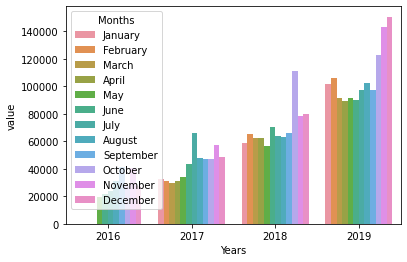

In [244]:
draw_bar_plot()

In [202]:
def draw_box_plot():    
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['Year'] = [d.year for d in df_box.date]
    df_box['months'] = [d.strftime('%b') for d in df_box.date]
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.boxplot(x="Year", y="value", data=df_box)
    plt.subplot(122)
    sns.boxplot(x="months", y="value", data=df_box,order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

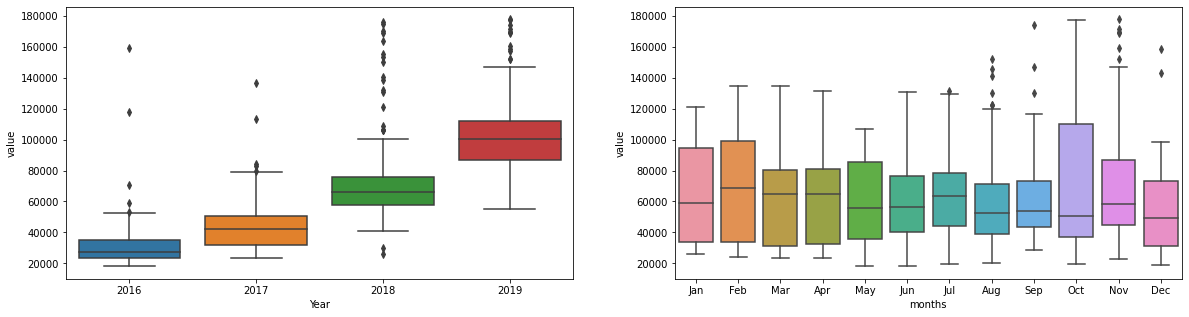

In [222]:
draw_box_plot()